# Hands-on activity: Central dogma of molecular biology in our own cells

## Part 1. Human genome, transcriptome, proteome

There are multiple resources listed towards the bottom of this page, which provide information about the human genome. For example, you can download information about the human genome, transcriptome, and proteome from RefSeq or from GENCODE.

Using these resources, report on the following questions:

1. **How many genes are there in the human genome?**
2. **How many transcripts are there in the human transcriptome?**
3. **What are the different kinds/classes of RNA present in the human transcriptome?**
4. **How many protein-coding genes are there in the human genome?**
5. **How many proteins are there in the human proteome?**
6. **Plot the distribution of lengths of genes.**
7. **Plot the distribution of the length of exons.**
8. **Plot the distribution of the length of introns.**

## Prerequisites: Downloading the necessary data and importing the libraries.

In [1]:
!pip install nbdime

Defaulting to user installation because normal site-packages is not writeable
  Using cached nbdime-4.0.2-py3-none-any.whl.metadata (9.5 kB)
  Using cached jupyter_server_mathjax-0.2.6-py3-none-any.whl.metadata (2.1 kB)
Using cached nbdime-4.0.2-py3-none-any.whl (5.9 MB)
Using cached jupyter_server_mathjax-0.2.6-py3-none-any.whl (3.1 MB)


In [ ]:
# Version Check
!nbdiff-web Bioinformatics_Ex1.ipynb https://raw.githubusercontent.com/KyleCarlo/gene-annotation-analysis-of-human-genome/refs/heads/main/Bioinformatics_Ex1.ipynb

In [7]:
# Merging
!nbmerge-web Bioinformatics_Ex1.ipynb Bioinformatics_Ex1.ipynb https://raw.githubusercontent.com/KyleCarlo/gene-annotation-analysis-of-human-genome/refs/heads/main/Bioinformatics_Ex1.ipynb --out merged.ipynb

[I nbdimeserver:431] Listening on 127.0.0.1, port 63155
[I webutil:29] URL: http://127.0.0.1:63155/merge?base=base.ipynb&local=local.ipynb&remote=remote.ipynb
[E nbdimeserver:111] Supplied argument cannot be read: 'base.ipynb'
Traceback (most recent call last):
  File "C:\Users\Kyle Carlo C. Lasala\AppData\Roaming\Python\Python312\site-packages\nbdime\webapp\nbdimeserver.py", line 85, in read_notebook
    raise ValueError('Supplied argument cannot be read: %r' % arg)
ValueError: Supplied argument cannot be read: 'base.ipynb'
[W web:1873] 422 POST /api/merge?1748022213052 (127.0.0.1): Invalid notebook: base.ipynb
[W log:99] 422 POST /api/merge?1748022213052 (@127.0.0.1) 2.03ms referer=http://127.0.0.1:63155/merge?base=base.ipynb&local=local.ipynb&remote=remote.ipynb
[I nbdimeserver:320] Closing server on remote request (1)


In [1]:
# for google colab only
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# pyranges for reading gtf
!pip install pyranges

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
     ------------------------- -------------- 0.8/1.2 MB 4.8 MB/s eta 0:00:01
     ---------------------------------------- 1.2/1.2 MB 4.2 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   --------------------------------

In [1]:
import pyranges as pr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# CHANGE THIS ACCORDINGLY
# path to the file location (always ends with '/')
gc_location = './'
refseq_location = './'

### GENCODE: Accessing GTF

In [29]:
gc_compre = pr.read_gtf(gc_location + 'gencode.v48.annotation.gtf')

In [30]:
gc_compre_df = gc_compre.df
del gc_compre

In [31]:
gc_compre_df['length'] = gc_compre_df['End'] - gc_compre_df['Start']

### REFSEQ: Accessing GTF

Cleaning RefSeq Input

In [3]:
df = pd.read_csv(refseq_location + "GCF_000001405.40_GRCh38.p14_genomic.gtf", sep="\t", header=None, dtype=str, comment="#")
# Fill NaNs read as floats with empty strings
df = df.fillna("")
df.to_csv(refseq_location + "refseq_output.gtf", sep="\t", index=False, header=False, quoting=3)
del df

In [4]:
refseq = pr.readers.read_gtf(refseq_location + 'refseq_output.gtf', rename_attr=True)

Found attributes with reserved names: ['source'].
Renaming attributes with suffix '_attr'


In [5]:
refseq_df = refseq.df
del refseq

In [6]:
refseq_df['length'] = refseq_df['End'] - refseq_df['Start']

### How many genes are there in the human genome?

Frankish, A., Uszczynska, B., Ritchie, G.R. et al. Comparison of GENCODE and RefSeq gene annotation and the impact of reference geneset on variant effect prediction. BMC Genomics 16 (Suppl 8), S2 (2015). https://doi.org/10.1186/1471-2164-16-S8-S2

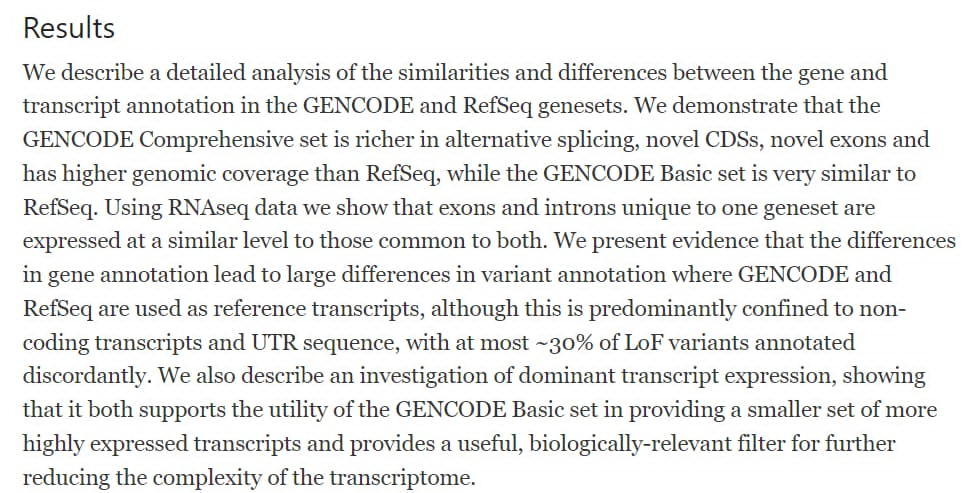

Data Source: GENCODE

In [43]:
gc_compre_df['gene_id'].nunique()

78686

Without Pseudogenes

In [45]:
gc_compre_df[(~gc_compre_df["gene_type"].str.contains("pseudogene"))]["gene_id"].nunique()

63494

Data Source: RefSeq

In [6]:
refseq_df["gene"].nunique()

59701

Without pseudogenes

In [7]:
refseq_df[refseq_df['pseudo'] != "true"]["gene"].nunique()

42638

### How many transcripts are there in the human transcriptome?

Data Source: GENCODE

In [7]:
gc_compre_df['transcript_id'].nunique()

385669

Data Source: RefSeq (NCBI)

In [8]:
refseq_df['transcript_id'].nunique()

201190

### What are the different kinds/classes of RNA present in the human transcriptome?

In [8]:
gc_compre_df[gc_compre_df['gene_type'].str.contains('RNA')]['gene_type'].unique()

array(['lncRNA', 'miRNA', 'misc_RNA', 'snRNA', 'scaRNA', 'snoRNA',
       'rRNA_pseudogene', 'rRNA', 'sRNA', 'vault_RNA', 'Mt_tRNA',
       'Mt_rRNA'], dtype=object)

In [19]:
refseq_df[refseq_df['transcript_biotype'].str.contains('RNA', na=False)]['transcript_biotype'].unique()

array(['lnc_RNA', 'miRNA', 'mRNA', 'snoRNA', 'ncRNA', 'antisense_RNA',
       'snRNA', 'tRNA', 'rRNA', 'telomerase_RNA', 'vault_RNA', 'Y_RNA',
       'RNase_MRP_RNA', 'scRNA', 'RNase_P_RNA'], dtype=object)

### How many protein-coding genes are there in the human genome?

In [9]:
gc_compre_df[(gc_compre_df['gene_type']=='protein_coding') & (~gc_compre_df['tag'].str.contains('read', na=True))]['gene_id'].nunique()

19628

In [11]:
refseq_df[(refseq_df["gene_biotype"] == 'protein_coding')]["gene"].nunique()

20078

### How many proteins are there in the human proteome?

In [10]:
gc_compre_df['protein_id'].nunique()

112346

In [12]:
refseq_df["protein_id"].nunique()

136282

### Plot the distribution of lengths of genes.

In [11]:
gc_compre_df[gc_compre_df["Feature"]=="gene"].describe()

,Start,End,length
count,7.868600e+04,7.868600e+04,7.868600e+04
mean,7.474854e+07,7.477998e+07,3.143951e+04
std,5.588770e+07,5.589030e+07,8.614636e+04
min,5.760000e+02,6.470000e+02,8.000000e+00
25%,3.038022e+07,3.040348e+07,7.620000e+02
50%,6.218170e+07,6.220718e+07,4.597000e+03
75%,1.104158e+08,1.104551e+08,2.596650e+04
max,2.489366e+08,2.489371e+08,2.473539e+06


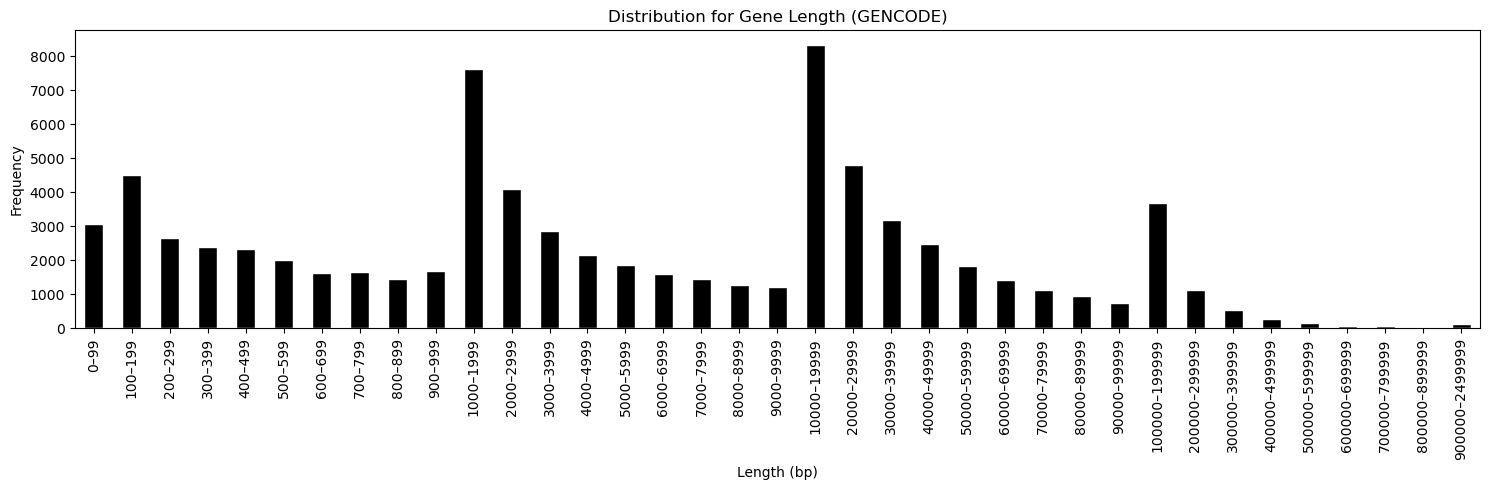

In [12]:
# DONE JUST NOT RAN IN GENCODE
gc_compre_subdf = gc_compre_df[['Feature', 'length']]
gene_lengths = gc_compre_subdf[gc_compre_subdf['Feature'] == 'gene']['length']

bin_edges = (
    list(range(0, 1000, 100)) +
    list(range(1000, 10000, 1000)) +
    list(range(10000, 100000, 10000)) +
    list(range(100000, 1000000, 100000)) +
    [2500000]
)
bin_labels = [f"{bin_edges[i]}–{bin_edges[i+1]-1}" for i in range(len(bin_edges)-1)]

binned = pd.cut(gene_lengths, bins=bin_edges, labels=bin_labels, right=True)

bin_counts = binned.value_counts(sort=False)

plt.figure(figsize=(15, 5))
bin_counts.plot(kind='bar', color='black', edgecolor='white')
plt.xlabel("Length (bp)")
plt.ylabel("Frequency")
plt.title("Distribution for Gene Length (GENCODE)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Check min and max length
refseq_df[refseq_df["Feature"] == "gene"].describe()

,Start,End,length
count,6.742900e+04,6.742900e+04,6.742900e+04
mean,6.600083e+07,6.602978e+07,2.894732e+04
std,5.792598e+07,5.793032e+07,8.293749e+04
min,0.000000e+00,1.070000e+02,8.000000e+00
25%,1.834998e+07,1.837848e+07,9.000000e+02
50%,5.159851e+07,5.162277e+07,5.293000e+03
75%,1.029000e+08,1.029508e+08,2.268500e+04
max,2.489366e+08,2.489371e+08,2.473620e+06


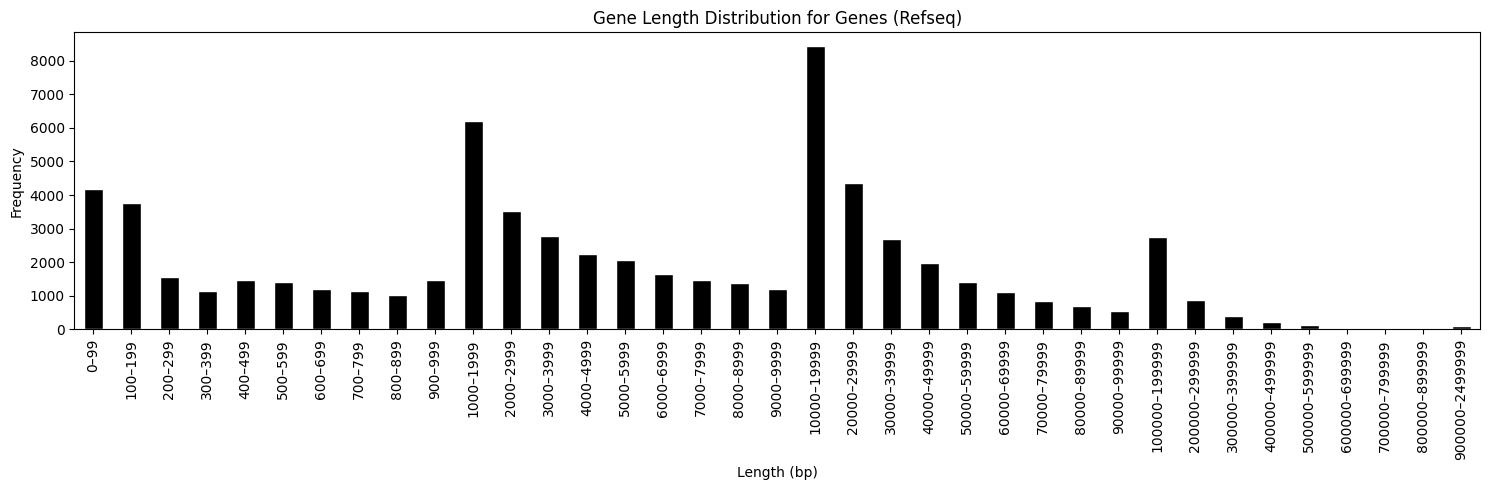

In [ ]:
refseq_compre_subdf = refseq_df[['Feature', 'length']]
gene_lengths = refseq_compre_subdf[refseq_compre_subdf['Feature'] == 'gene']['length']
bin_edges = (
    list(range(0, 1000, 100)) +
    list(range(1000, 10000, 1000)) +
    list(range(10000, 100000, 10000)) +
    list(range(100000, 1000000, 100000)) +
    [2500000]
)
bin_labels = [f"{bin_edges[i]}–{bin_edges[i+1]-1}" for i in range(len(bin_edges)-1)]

binned = pd.cut(gene_lengths, bins=bin_edges, labels=bin_labels, right=True)

bin_counts = binned.value_counts(sort=False)

plt.figure(figsize=(15, 5))
bin_counts.plot(kind='bar', color='black', edgecolor='white')
plt.xlabel("Length (bp)")
plt.ylabel("Frequency")
plt.title("Distribution for Gene Length (Refseq)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Plot the distribution of the length of exons.

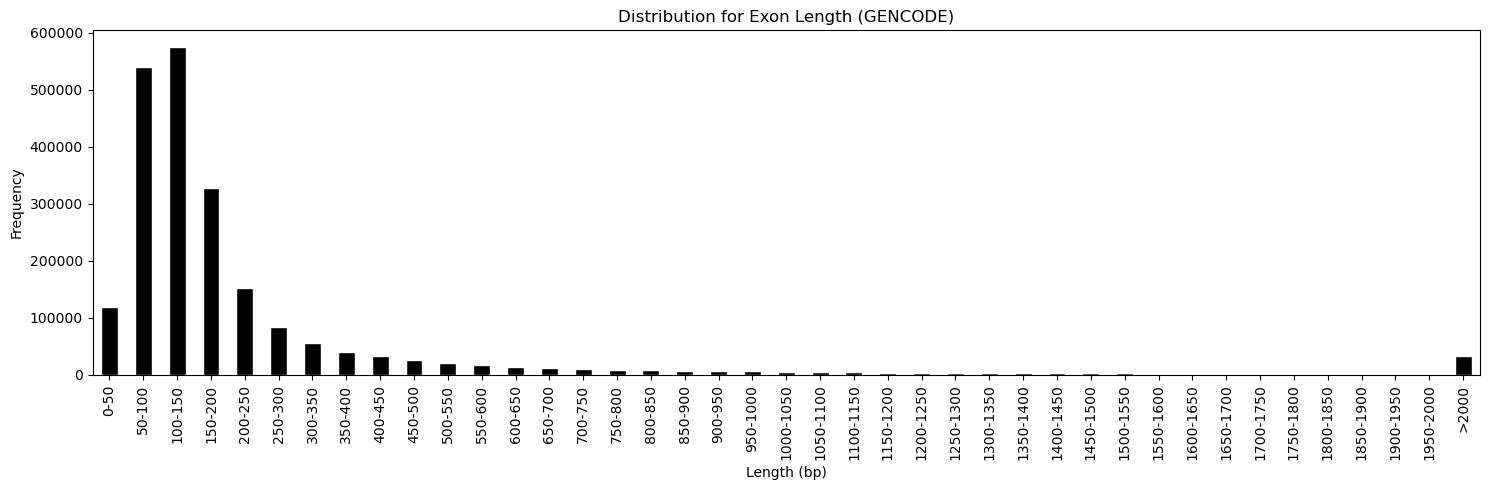

In [53]:
# DONE JUST NOT RAN IN COLAB
gc_compre_subdf = gc_compre_df[['Feature', 'length']]
gene_lengths = gc_compre_subdf[gc_compre_subdf['Feature'] == 'exon']['length']

bin_edges = list(range(0, 2001, 50)) + [10000]
bin_labels = [f"{i}-{i+50}" for i in range(0, 2000, 50)] + ['>2000']
binned = pd.cut(gene_lengths, bins=bin_edges, labels=bin_labels, right=True)

bin_counts = binned.value_counts(sort=False)

plt.figure(figsize=(15, 5))
bin_counts.plot(kind='bar', color='black', edgecolor='white')
plt.xlabel("Length (bp)")
plt.ylabel("Frequency")
plt.title("Distribution for Exon Length (GENCODE)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

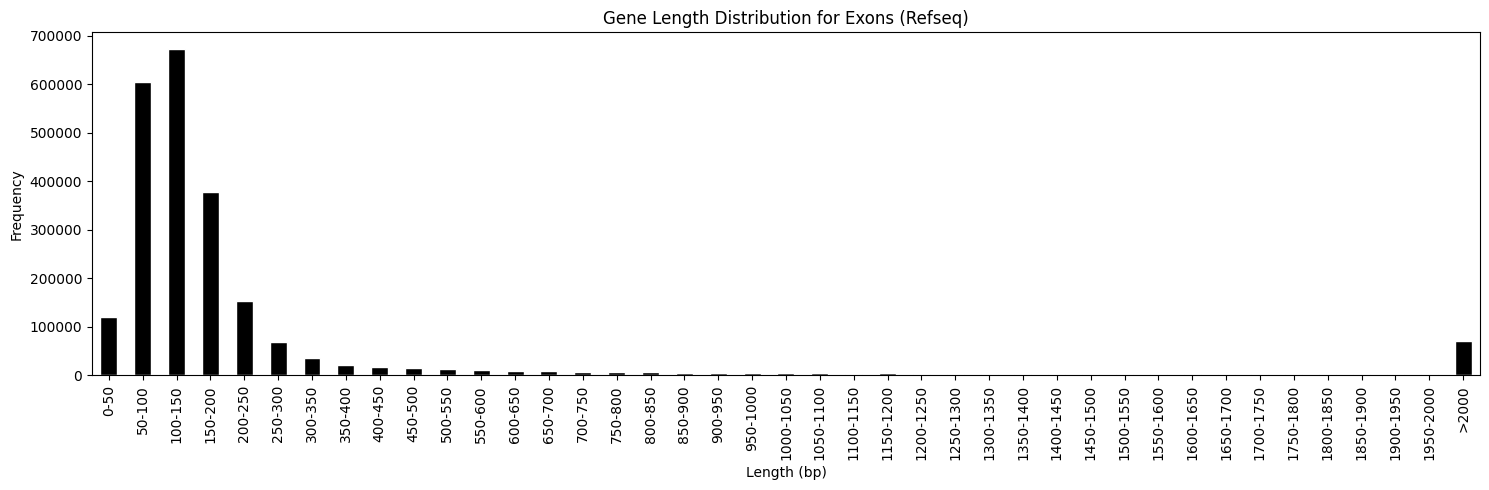

In [ ]:
refseq_compre_subdf = refseq_df[['Feature', 'length']]
exon_lengths = refseq_compre_subdf[refseq_compre_subdf['Feature'] == 'exon']['length']

bin_edges = list(range(0, 2001, 50)) + [10000]
bin_labels = [f"{i}-{i+50}" for i in range(0, 2000, 50)] + ['>2000']
binned = pd.cut(exon_lengths, bins=bin_edges, labels=bin_labels, right=True)

bin_counts = binned.value_counts(sort=False)

plt.figure(figsize=(15, 5))
bin_counts.plot(kind='bar', color='black', edgecolor='white')
plt.xlabel("Length (bp)")
plt.ylabel("Frequency")
plt.title("Distribution for Exon Length (Refseq)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Plot the distribution of the length of introns.

In [14]:
gc_exons = gc_compre_df.groupby(by=['Feature', 'transcript_id']).sum('length').T['exon']
gc_trans = gc_compre_df.groupby(by=['Feature', 'transcript_id']).sum('length').T['transcript']
gc_exons = gc_exons.T['length'].reset_index()
gc_trans = gc_trans.T['length'].reset_index()
gc_merged = gc_trans.merge(gc_exons, on='transcript_id')
gc_merged['introns'] = gc_merged['length_x'] - gc_merged['length_y']

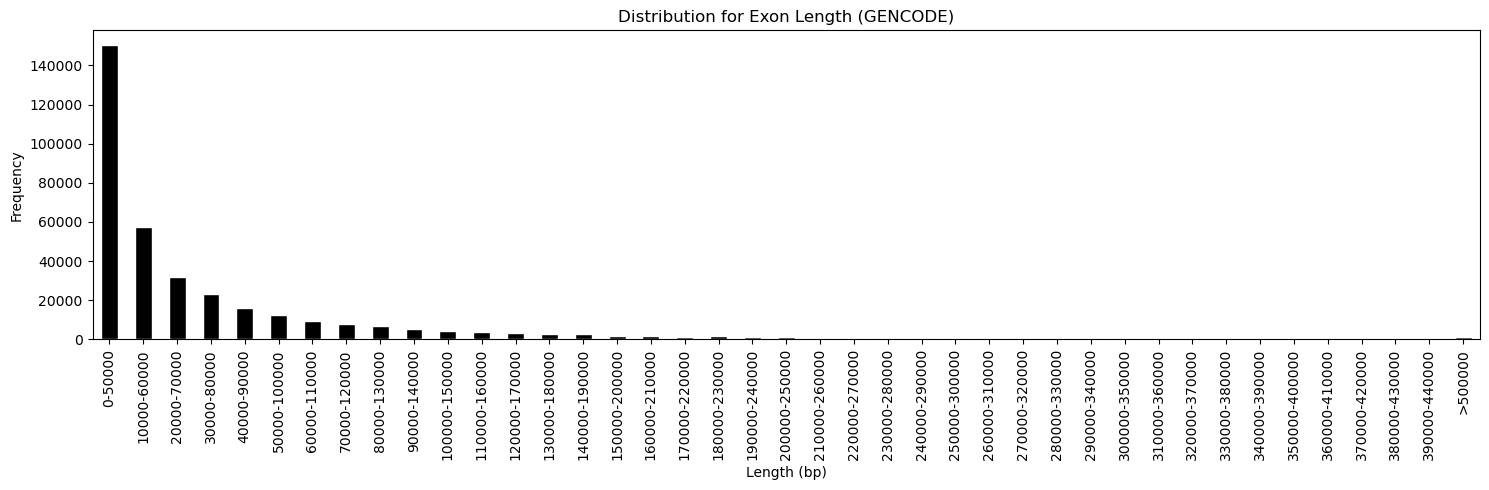

In [57]:
intron_lengths = gc_merged['introns']

bin_edges = list(range(0, 400_001, 10_000)) + [500_000]
bin_labels = [f"{i}-{i+50_000}" for i in range(0, 400_000, 10_000)] + ['>500000']
binned = pd.cut(intron_lengths, bins=bin_edges, labels=bin_labels, right=True)

bin_counts = binned.value_counts(sort=False)

plt.figure(figsize=(15, 5))
bin_counts.plot(kind='bar', color='black', edgecolor='white')
plt.xlabel("Length (bp)")
plt.ylabel("Frequency")
plt.title("Distribution for Exon Length (GENCODE)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Refseq

In [21]:
refseq_exons = refseq_df.groupby(by=['Feature', 'transcript_id']).sum('length').T['exon']
refseq_trans = refseq_df.groupby(by=['Feature', 'transcript_id']).sum('length').T['transcript']
refseq_exons = refseq_exons.T['length'].reset_index()
refseq_trans = refseq_trans.T['length'].reset_index()
refseq_merged = refseq_trans.merge(refseq_exons, on='transcript_id')
refseq_merged['introns'] = refseq_merged['length_x'] - refseq_merged['length_y']

C:\Users\Daphne Go\AppData\Local\Temp\ipykernel_23328\2067457986.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  refseq_exons = refseq_df.groupby(by=['Feature', 'transcript_id']).sum('length').T['exon']
C:\Users\Daphne Go\AppData\Local\Temp\ipykernel_23328\2067457986.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  refseq_trans = refseq_df.groupby(by=['Feature', 'transcript_id']).sum('length').T['transcript']


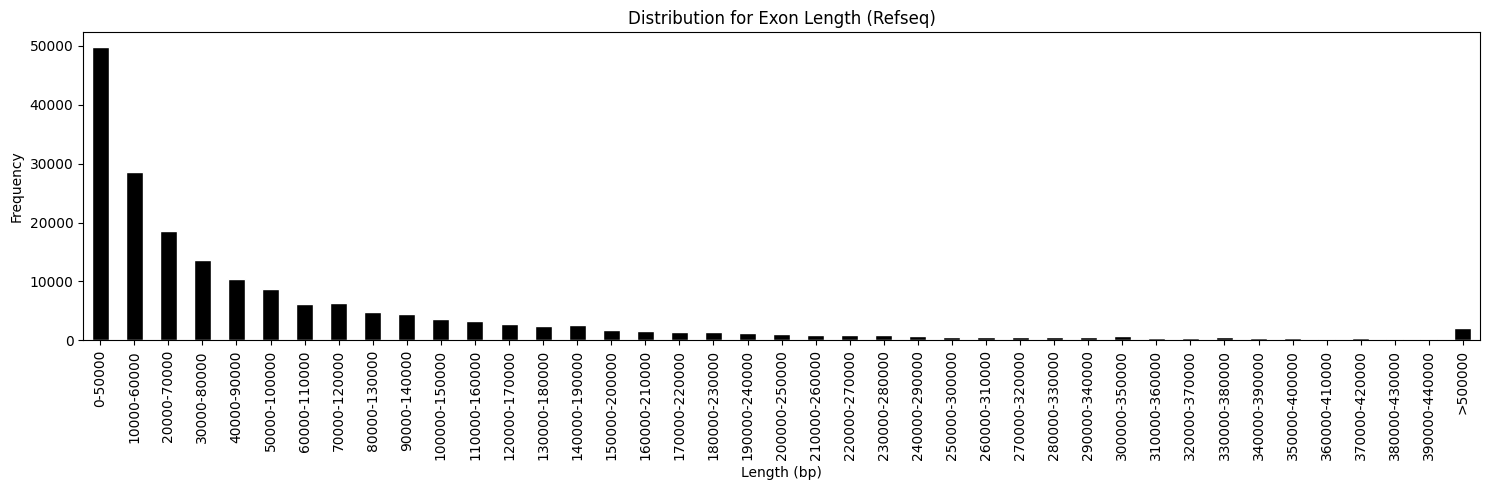

In [23]:
intron_lengths = refseq_merged['introns']

bin_edges = list(range(0, 400_001, 10_000)) + [500_000]
bin_labels = [f"{i}-{i+50_000}" for i in range(0, 400_000, 10_000)] + ['>500000']
binned = pd.cut(intron_lengths, bins=bin_edges, labels=bin_labels, right=True)

bin_counts = binned.value_counts(sort=False)

plt.figure(figsize=(15, 5))
bin_counts.plot(kind='bar', color='black', edgecolor='white')
plt.xlabel("Length (bp)")
plt.ylabel("Frequency")
plt.title("Distribution for Exon Length (Refseq)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Part 2

### TP53- Tumor yada

Number 1
- Where is it located in the genome, based on hg38 reference genome coordinates?

In [38]:
refseq_df[(refseq_df["Chromosome"] == "NC_000017.11") &
                     (refseq_df["Feature"] == "gene") & 
                     (refseq_df["Source"] == "BestRefSeq") &
                     (refseq_df["gene"].str.contains("TP53"))][["gene", "gene_id", "Start", "End"]]

,gene,gene_id,Start,End
3554706,TP53,TP53,7668420,7687490


Number 2
- In which human tissues is the gene known to be expressed ?

Insert Answer

Number 3
- How many gene isoforms (alternatively spliced mRNAs) are known for each gene?



In [ ]:
#Insert code

Number 4 (Assigned to Ky and Dap)
- What is the average length of exons and average length of introns, across all isoforms?

Number 5
- How many protein isoforms are known for each gene?

Number 6
- What functions of the genes/proteins are known?

Insert Answer

### Second Gene

### Third Gene